In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

# EDA (Exploratory Data Analysis)

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


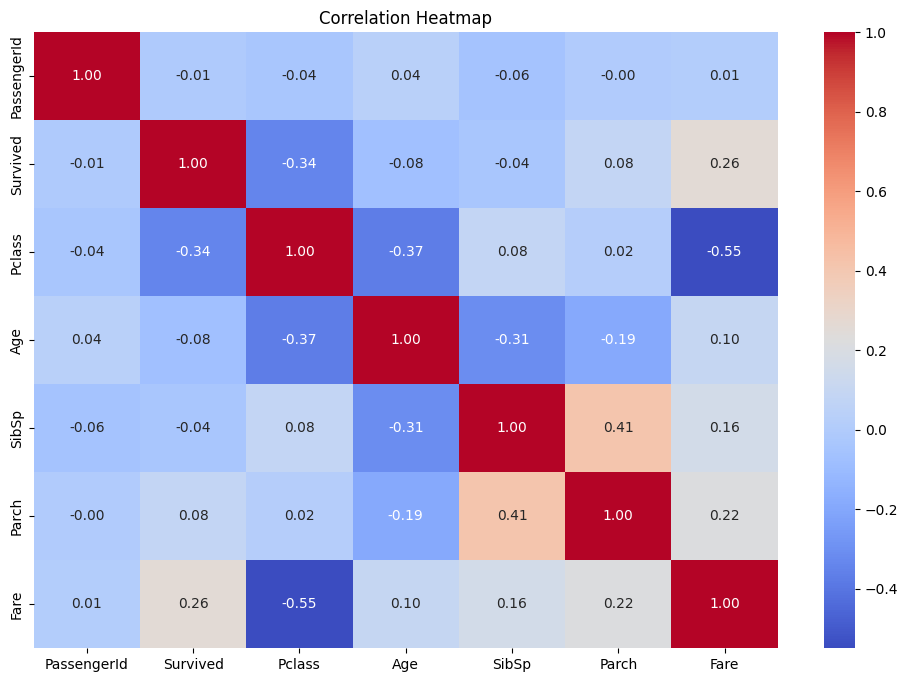

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# FE (Feature Engineering)

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [14]:
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [15]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\yko72\AppData\Local\Temp\ipykernel_25064\987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [16]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4   # <-- add the assignment


In [17]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [19]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [20]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,male,22.0,7.2500,S,0
1,2,1,1,female,38.0,71.2833,C,0
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,0
4,5,0,3,male,35.0,8.0500,S,1


In [21]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66.0,22.0,3
1,38.0,38.0,1
2,78.0,26.0,3
3,35.0,35.0,1
4,105.0,35.0,3
5,NaN,NaN,3
6,54.0,54.0,1
7,6.0,2.0,3
8,81.0,27.0,3
9,28.0,14.0,2


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric = train_df.select_dtypes(include=['number']).columns.tolist()
categorical = train_df.select_dtypes(exclude=['number']).columns.tolist()

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('enc',  OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric),
    ('cat', categorical_transformer, categorical)
])

In [30]:
from sklearn.model_selection import train_test_split

# Separate features/target from the Titanic training frame
target_col = 'Survived'
X = train_df.drop(columns=[target_col])
y = train_df[target_col].astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_dsel, X_valid, y_dsel, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Fit the preprocessor on pool-training data
preprocessor.fit(X_train)

Xt_train = preprocessor.transform(X_train)
Xt_dsel  = preprocessor.transform(X_dsel)
Xt_valid = preprocessor.transform(X_valid)
Xt_test  = preprocessor.transform(test_df)

# Basic Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Dynamic Ensemble
from deslib.dcs.ola import OLA
from deslib.des.knora_e import KNORAE

pool = [
    KNeighborsClassifier(n_neighbors=7),
    RandomForestClassifier(n_estimators=300, random_state=42),
    LogisticRegression(max_iter=5000, solver='liblinear'),  # n_jobs ignored if not supported
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    SVC(probability=True, kernel='rbf', C=2, gamma='scale', random_state=42),
]

# Fit each base model on the TRAIN split
for i, base in enumerate(pool, start=1):
    base.fit(Xt_train, y_train)

ola = OLA(pool_classifiers=pool, k=7)
knorae = KNORAE(pool_classifiers=pool)

# Fit DES models on DSEL (they learn local competence profiles here)
ola.fit(Xt_dsel, y_dsel)
knorae.fit(Xt_dsel, y_dsel)


c:\Users\yko72\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\yko72\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


KNORAE(pool_classifiers=[KNeighborsClassifier(n_neighbors=7),
                         RandomForestClassifier(n_estimators=300,
                                                random_state=42),
                         LogisticRegression(max_iter=5000, solver='liblinear'),
                         GaussianNB(),
                         DecisionTreeClassifier(max_depth=5, random_state=42),
                         SVC(C=2, probability=True, random_state=42)])

In [39]:

from sklearn.metrics import classification_report

# Predictions on the holdout validation split
y_pred_ola    = ola.predict(Xt_valid)
y_pred_knorae = knorae.predict(Xt_valid)

# Print classification reports for both models
print("OLA Classification Report:")
print(classification_report(y_valid, y_pred_ola, digits=4))
print("KNORA-E Classification Report:")
print(classification_report(y_valid, y_pred_knorae, digits=4))

OLA Classification Report:
              precision    recall  f1-score   support

           0     0.7738    0.7831    0.7784        83
           1     0.6400    0.6275    0.6337        51

    accuracy                         0.7239       134
   macro avg     0.7069    0.7053    0.7061       134
weighted avg     0.7229    0.7239    0.7233       134

KNORA-E Classification Report:
              precision    recall  f1-score   support

           0     0.7556    0.8193    0.7861        83
           1     0.6591    0.5686    0.6105        51

    accuracy                         0.7239       134
   macro avg     0.7073    0.6940    0.6983       134
weighted avg     0.7188    0.7239    0.7193       134

